**Data Preprocessing**

In [ ]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls "/content/drive/My Drive/Colab Notebooks/images/UTKFace"

In [ ]:
dir = []    #direction of files
for filename in os.listdir("/content/drive/My Drive/Colab Notebooks/images/UTKFace"):
    dir.append(os.path.join("/content/drive/My Drive/Colab Notebooks/images/UTKFace",filename))
c = len(dir)

In [ ]:
def load(folder):   #loading images with cv2
    images = []
    count=0
    for i in range(c):
        #img = cv2.imread(os.path.join(folder,dir[i]))
        img = cv2.imread(dir[i])
        print(count)
        count+=1
        if img is not None:
            images.append(img)
    return images

In [ ]:
test = load('/content/drive/My Drive/Colab Notebooks/images/UTKFace')
temp = np.array(test)
del test
len(temp)

In [ ]:
dir[7169] = '/content/drive/My Drive/Colab Notebooks/images/UTKFace/61_1_1_20170109142408075.jpg.chip.jpg'  #editing three images 
dir[12394] = '/content/drive/My Drive/Colab Notebooks/images/UTKFace/61_1_1_20170109150557335.jpg.chip.jpg'
dir[15406] = '/content/drive/My Drive/Colab Notebooks/images/UTKFace/39_1_1_20170116174525125.jpg.chip.jpg'

In [ ]:
img_temp = []     #flatten the 3 channels of images
for i in range(len(temp)):
    img_temp.append(temp[i].flatten())
del temp   
X = np.array(img_temp)
del img_temp

In [ ]:
l = X.shape[0]
X.shape

(23711, 120000)

In [ ]:
y_temp = []

y_temp = [dir[i].split("_") for i in range(len(dir))]

In [ ]:
y_1_main = [] 
y_2_main = []

y_1_main = [i[0].split("/")[-1] for i in y_temp] 
y_2_main = [i[2] for i in y_temp ]

In [ ]:
y_1_main

In [ ]:
y_2 = []
y_1 = []

y_2 = [int(y_2_main[i]) for i in range(len(y_2_main))]
y_1 =[ int(y_1_main[i]) for i in range(len(y_1_main))]


In [ ]:
#one hot encoding
from sklearn.preprocessing import OneHotEncoder
values_main = np.array(y_2)
onehot_encoder = OneHotEncoder(sparse=False)
values_main = values_main.reshape(len(values_main), 1)
y_2_main = onehot_encoder.fit_transform(values_main)
print(y_2_main)

[[1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 ...
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]]


In [ ]:
for i in range(len(y_2_main)):
  for j in range(len(y_2_main[0])):
    y_2_main[i][j]=int(y_2_main[i][j])

In [ ]:
y_1_main

In [ ]:
from sklearn.preprocessing import StandardScaler
def normal(b):    #function for normlizing data in k step
  temp_normal = np.array
  scaler = StandardScaler()
  if b == 21000:
    scaler.fit(X_main[b:21339,:])
    temp_normal = scaler.transform(X_main[b:21339,:])
  else:
    scaler.fit(X_main[b:b+500,:])
    temp_normal = scaler.transform(X_main[b:b+500,:])
  return temp_normal


In [ ]:
from sklearn.decomposition import PCA, IncrementalPCA
def i_pca(img_normal):
  temp_image = np.array
  n_components = 128
  ipca = IncrementalPCA(n_components=n_components, batch_size=128)
  ipca.fit(img_normal)
  X_ipca = ipca.transform(img_normal)
  #del image
  return X_ipca

In [ ]:
img_normal = np.array([]).reshape(0,128)
for i in range(0,21500,500):
  print(i)
  X_ipca = np.array
  temp_2 = normal(i)
  X_ipca = i_pca(temp_2)
  del temp_2
  img_normal = np.vstack([img_normal , X_ipca])
  print(img_normal.shape)
  del X_ipca

0


/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_incremental_pca.py:309: RuntimeWarning: Mean of empty slice.
  explained_variance[self.n_components_:].mean()
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


(500, 128)
500


/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_incremental_pca.py:309: RuntimeWarning: Mean of empty slice.
  explained_variance[self.n_components_:].mean()
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


(1000, 128)
1000


/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_incremental_pca.py:309: RuntimeWarning: Mean of empty slice.
  explained_variance[self.n_components_:].mean()
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


(1500, 128)
1500


/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_incremental_pca.py:309: RuntimeWarning: Mean of empty slice.
  explained_variance[self.n_components_:].mean()
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


(2000, 128)
2000


/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_incremental_pca.py:309: RuntimeWarning: Mean of empty slice.
  explained_variance[self.n_components_:].mean()
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


(2500, 128)
2500


/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_incremental_pca.py:309: RuntimeWarning: Mean of empty slice.
  explained_variance[self.n_components_:].mean()
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


(3000, 128)
3000


/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_incremental_pca.py:309: RuntimeWarning: Mean of empty slice.
  explained_variance[self.n_components_:].mean()
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


(3500, 128)
3500


/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_incremental_pca.py:309: RuntimeWarning: Mean of empty slice.
  explained_variance[self.n_components_:].mean()
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


(4000, 128)
4000


/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_incremental_pca.py:309: RuntimeWarning: Mean of empty slice.
  explained_variance[self.n_components_:].mean()
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


(4500, 128)
4500


/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_incremental_pca.py:309: RuntimeWarning: Mean of empty slice.
  explained_variance[self.n_components_:].mean()
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


(5000, 128)
5000


/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_incremental_pca.py:309: RuntimeWarning: Mean of empty slice.
  explained_variance[self.n_components_:].mean()
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


(5500, 128)
5500


/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_incremental_pca.py:309: RuntimeWarning: Mean of empty slice.
  explained_variance[self.n_components_:].mean()
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


(6000, 128)
6000


/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_incremental_pca.py:309: RuntimeWarning: Mean of empty slice.
  explained_variance[self.n_components_:].mean()
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


(6500, 128)
6500


/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_incremental_pca.py:309: RuntimeWarning: Mean of empty slice.
  explained_variance[self.n_components_:].mean()
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


(7000, 128)
7000


/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_incremental_pca.py:309: RuntimeWarning: Mean of empty slice.
  explained_variance[self.n_components_:].mean()
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


(7500, 128)
7500


/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_incremental_pca.py:309: RuntimeWarning: Mean of empty slice.
  explained_variance[self.n_components_:].mean()
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


(8000, 128)
8000


/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_incremental_pca.py:309: RuntimeWarning: Mean of empty slice.
  explained_variance[self.n_components_:].mean()
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


(8500, 128)
8500


/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_incremental_pca.py:309: RuntimeWarning: Mean of empty slice.
  explained_variance[self.n_components_:].mean()
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


(9000, 128)
9000


/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_incremental_pca.py:309: RuntimeWarning: Mean of empty slice.
  explained_variance[self.n_components_:].mean()
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


(9500, 128)
9500


/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_incremental_pca.py:309: RuntimeWarning: Mean of empty slice.
  explained_variance[self.n_components_:].mean()
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


(10000, 128)
10000


/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_incremental_pca.py:309: RuntimeWarning: Mean of empty slice.
  explained_variance[self.n_components_:].mean()
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


(10500, 128)
10500


/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_incremental_pca.py:309: RuntimeWarning: Mean of empty slice.
  explained_variance[self.n_components_:].mean()
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


(11000, 128)
11000


/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_incremental_pca.py:309: RuntimeWarning: Mean of empty slice.
  explained_variance[self.n_components_:].mean()
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


(11500, 128)
11500


/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_incremental_pca.py:309: RuntimeWarning: Mean of empty slice.
  explained_variance[self.n_components_:].mean()
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


(12000, 128)
12000


/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_incremental_pca.py:309: RuntimeWarning: Mean of empty slice.
  explained_variance[self.n_components_:].mean()
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


(12500, 128)
12500


/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_incremental_pca.py:309: RuntimeWarning: Mean of empty slice.
  explained_variance[self.n_components_:].mean()
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


(13000, 128)
13000


/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_incremental_pca.py:309: RuntimeWarning: Mean of empty slice.
  explained_variance[self.n_components_:].mean()
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


(13500, 128)
13500


/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_incremental_pca.py:309: RuntimeWarning: Mean of empty slice.
  explained_variance[self.n_components_:].mean()
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


(14000, 128)
14000


/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_incremental_pca.py:309: RuntimeWarning: Mean of empty slice.
  explained_variance[self.n_components_:].mean()
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


(14500, 128)
14500


/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_incremental_pca.py:309: RuntimeWarning: Mean of empty slice.
  explained_variance[self.n_components_:].mean()
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


(15000, 128)
15000


/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_incremental_pca.py:309: RuntimeWarning: Mean of empty slice.
  explained_variance[self.n_components_:].mean()
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


(15500, 128)
15500


/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_incremental_pca.py:309: RuntimeWarning: Mean of empty slice.
  explained_variance[self.n_components_:].mean()
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


(16000, 128)
16000


/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_incremental_pca.py:309: RuntimeWarning: Mean of empty slice.
  explained_variance[self.n_components_:].mean()
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


(16500, 128)
16500


/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_incremental_pca.py:309: RuntimeWarning: Mean of empty slice.
  explained_variance[self.n_components_:].mean()
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


(17000, 128)
17000


/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_incremental_pca.py:309: RuntimeWarning: Mean of empty slice.
  explained_variance[self.n_components_:].mean()
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


(17500, 128)
17500


/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_incremental_pca.py:309: RuntimeWarning: Mean of empty slice.
  explained_variance[self.n_components_:].mean()
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


(18000, 128)
18000


/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_incremental_pca.py:309: RuntimeWarning: Mean of empty slice.
  explained_variance[self.n_components_:].mean()
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


(18500, 128)
18500


/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_incremental_pca.py:309: RuntimeWarning: Mean of empty slice.
  explained_variance[self.n_components_:].mean()
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


(19000, 128)
19000


/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_incremental_pca.py:309: RuntimeWarning: Mean of empty slice.
  explained_variance[self.n_components_:].mean()
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


(19500, 128)
19500


/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_incremental_pca.py:309: RuntimeWarning: Mean of empty slice.
  explained_variance[self.n_components_:].mean()
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


(20000, 128)
20000


/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_incremental_pca.py:309: RuntimeWarning: Mean of empty slice.
  explained_variance[self.n_components_:].mean()
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


(20500, 128)
20500


/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_incremental_pca.py:309: RuntimeWarning: Mean of empty slice.
  explained_variance[self.n_components_:].mean()
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


(21000, 128)
21000


/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_incremental_pca.py:309: RuntimeWarning: Mean of empty slice.
  explained_variance[self.n_components_:].mean()
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


(21339, 128)


In [ ]:
df.to_csv(r'/content/drive/My Drive/Colab Notebooks/X.csv', index = False)

In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/X.csv')

In [ ]:
df.drop('Unnamed: 0',axis=1 , inplace=True)

In [ ]:
X_main = np.array(df)

In [ ]:
y_1_main = y_1

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_main)
X_main = scaler.transform(X_main)

In [ ]:
from sklearn.model_selection import train_test_split    #spliting data to test and train
X_1_main, X_1_test, y_1_main, y_1_test = train_test_split(X_main, y_1_main , test_size=0.1, random_state=None)
X_2_main, X_2_test, y_2_main, y_2_test = train_test_split(X_main, y_2_main , test_size=0.1, random_state=None)

In [ ]:
from sklearn.model_selection import train_test_split    #spliting data to test and train
X_1_train, X_1_validation, y_1_train, y_1_validation = train_test_split(X_1_main, y_1_main , test_size=0.1, random_state=None)
X_2_train, X_2_validation, y_2_train, y_2_validation = train_test_split(X_2_main, y_2_main , test_size=0.1, random_state=None)

In [ ]:
X_1_train = X_1_train[:,np.newaxis]
X_2_train = X_2_train[:,np.newaxis]
X_1_validation = X_1_validation[:,np.newaxis]
X_2_validation = X_2_validation[:,np.newaxis]
X_1_test = X_1_test[:,np.newaxis]
X_2_test = X_2_test[:,np.newaxis]

In [ ]:
y_1_train = np.array(y_1_train)
y_1_train = y_1_train[:,np.newaxis]
y_1_train = y_1_train[:,np.newaxis]

y_1_test = np.array(y_1_test)
y_1_test = y_1_test[:,np.newaxis]
y_1_test = y_1_test[:,np.newaxis]

y_1_validation=np.array(y_1_validation)
y_1_validation = y_1_validation[:,np.newaxis]
y_1_validation = y_1_validation[:,np.newaxis]

y_2_train = np.array(y_2_train)
#y_2_train = y_2_train[:,np.newaxis]
#y_2_train = y_2_train[:,np.newaxis]

y_2_test=np.array(y_2_test)
#y_2_test = y_2_test[:,np.newaxis]
#y_2_test = y_2_test[:,np.newaxis]

y_2_validation = np.array(y_2_validation)
#y_2_validation = y_2_validation[:,np.newaxis]
#y_2_validation = y_2_validation[:,np.newaxis]

linear regression network

In [ ]:
class loss:
    
    def l2_loss(y , y_pred):  #L2 as loss function
        return np.square(np.subtract( y , y_pred)).sum()
    
    def l2_loss_der( y_pred , y ): # derivitive of L2 T the loss function
        return 2*np.subtract( y_pred , y )
    

In [ ]:
class activation_c:
    
    
            
    def L_Relu(x):   #usnig relu for activation function
        return np.maximum(x,0.1*x)
    
    def LRelu_der(x): # derivitive of relu function
        a = np.ones(x[0].shape)
        for idx , i in enumerate(x[0]):
            if i<0:
                a[idx] *= 0.1
        a = a[np.newaxis , :  ]
        return a 
    

In [ ]:
import numpy as np
import random 
import math

class Network:
    
    #initiolize weight and biases
    def __init__(self, sizes ,w):   #if w =0 weights initilize by constant and w=1 weights initilized randomly
        self.num_layers = len(sizes)
        self.sizes = sizes
        self.biases = [np.zeros( i ) for i in sizes[1:]]
        if w == 0 :self.weights = [np.zeros([sizes[i], sizes[i+1]])for i in range(len(sizes)-1)]
        if w == 1 : self.weights = [np.random.randn(sizes[i], sizes[i+1])*0.1 for i in range(len(sizes)-1)]
        self.lr = 0.001
        #print(self.weights)
        #temp_weights = [np.ones(sizes[i], sizes[i+1]) for i in range(len(sizes)-1)]*0.01
        #self.weights = np.sum(self.weights,temp_weights)
        #self.sizes.append(1)
        #self.sizes = [128]+self.sizes
        #print(self.sizes)
    
    #def p(self):   # a temporoy function for checking the network
        #print(self.num_layers-1)
        
        
    #**************** forward ********************   
    def forward(self ,a):   #forward propagation (x.w)
        
        for i in range(self.num_layers-1):  # badan ke laye voroudi ro ezafe kardi -1 ro bardar
            w = self.weights[i]
            b = self.biases[i]
            a = activation_c.L_Relu(np.dot(a,w) + b)
        return a
    
    def p():
        print(loss.l2_loss([4],[2]))
    
    #******************back propagation************
    
    def backward(self,x,y):  #backward propagation
        #print("backward")
        db = []
        dw = []
        activations = []
        
        for b in self.biases:
            db .append(np.zeros(b.shape)) 
        for w in self.weights:
            dw .append(np.zeros(w.shape)) 

        activation = x
        activations .append(x)  # list to store all the activations, layer by layer

        zs = [] # list to store all the z vectors, layer by layer
        for b, w in zip(self.biases, self.weights):
            
            z = np.dot( activation , w )+b
            #print("z",z)
            zs.append(z)
            activation = activation_c.L_Relu(z)
            activations.append(activation)
 
        #print(activations)
            
        # backward pass 
        b =  loss.l2_loss_der(activations[-1], y) * activation_c.LRelu_der(zs[-1])
        
        db[-1] = b
        dw[-1] = np.dot(activations[-2].transpose(), b)
        
        for l in range(2, self.num_layers):
        
            z = zs[-l]
            rd =activation_c.LRelu_der(z)
            #print("b",b)
            #print("weights",self.weights[-l+1])
            #print("rd",rd)
            b = np.dot( b , self.weights[-l+1].transpose()) * rd
            db[-l] = b
            dw[-l] = np.dot(activations[-l-1].transpose()  , b)
        return (db, dw)
    
    #*************** SGD ################
    def SGD(self, training_data   ):
        #epochs = 1
        batch_size = 128
        #lr = 0.001

        n = len(training_data)
        random.shuffle(training_data)
        #print("training data:" , training_data)
        mini_batches = [training_data[k:k+batch_size]
                        for k in range(0, n, batch_size)]
        #print("mini batches",mini_batches)
        for mini_batch in mini_batches:
            #print("m",mini_batch)
            self.update_mini_batch(mini_batch)
            #lr = 0.001 * math.pow(0.5,  math.floor((1+j)/2))

        




    #************* update mini batch *************
    def update_mini_batch(self, mini_batch):
        #print("hello")
        m=0.9
        vdb = [np.zeros(b.shape) for b in self.biases]
        vdw = [np.zeros(w.shape) for w in self.weights]
        for x, y in mini_batch:
            db, dw = self.backward(x, y)
            vdb = [m*vd_b+d_b for vd_b, d_b in zip(vdb, db)]
            vdw = [m*vd_w+d_w for vd_w, d_w in zip(vdw, dw)]
            #print(vdw)
        self.weights = [w-((self.lr/len(mini_batch))*nw)
                        for w, nw in zip(self.weights, vdw)]
        self.biases = [b-((self.lr/len(mini_batch))*nb)
                       for b, nb in zip(self.biases, vdb)]
        
    #************* loss ****************
    def loss(self , data):

        y_pred = []
        X_data = [i for i,j in data]
        for i in X_data:
            y_pred.append(self.forward(i))
        y_data = [j for i,j in data]
        loss_temp = loss.l2_loss(y_data,y_pred)
        return loss_temp
    #************nemudar**********
    def plot():
        print("hi")
        
    #*************** main *****************
    def main(self , train , validation , lr):
        
        loss_t = []
        loss_v = []
        epochs = 100
        for j in range(epochs):
            self.SGD(train)
            if lr == 'constant': self.lr -=0.000005
            if lr == 'step': self.lr = 0.001 * math.pow(0.5,  math.floor((1+j)/10))
            loss_t.append(self.loss(train)/len(train))
            loss_v.append(self.loss(validation)/len(validation))
        print(loss_t)
        print(loss_v)
        return loss_t ,loss_v
        
        


In [ ]:
train = zip(X_1_train, y_1_train)
final_train = [i for i in train]

val = zip(X_1_validation , y_1_validation)
final_val = [i for i in val]

In [ ]:
j = Network([128,32,32,1],0)
lt6 ,lv6 = j.main(final_train,final_val,'constant')

[1449.0536898795863, 1398.1121720917572, 1347.8667863273035, 1303.7823248876966, 1262.1809625115134, 1220.7360714425083, 1182.145384420339, 1145.6244066942377, 1110.7805231244024, 1077.4001151017799, 1045.6898705223368, 1014.0946365794227, 985.3835559502589, 958.08411031165, 931.8292369866386, 907.5073348115225, 886.1944328579706, 863.6827573738814, 842.6214095271565, 823.4326563274504, 803.2385085032952, 785.2515572043948, 769.5283884042138, 752.7594208269953, 736.7756197058244, 721.4409412039438, 707.6277215182166, 694.7251383289617, 681.9713904010356, 670.027510796698, 657.9587979182703, 646.9336822723321, 635.7692475451688, 625.9152288971381, 616.9145976495768, 607.6780038534882, 599.1229224435484, 591.7494974797465, 584.4433920840393, 576.3437607939428, 569.1174593903091, 562.7929784624961, 556.2418809643488, 550.407630772882, 544.255887711419, 538.0223146593937, 532.6939820800354, 527.9685925502376, 523.6069069558396, 519.3594421677841, 514.86798436576, 510.6517275447748, 506.354

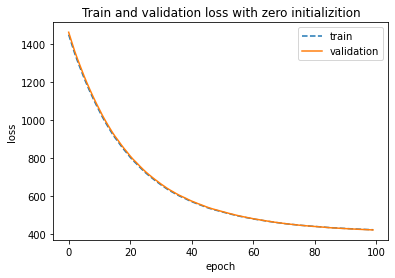

In [ ]:
x = np.arange(0, 100 )  
plt.plot(x , lt6,"--"  )
plt.plot(x , lv6  )
plt.legend(['train','validation'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.figsize=(30,20)
plt.title('Train and validation loss with zero initializition');
plt.show()

In [ ]:
e = Network([128,32,32,1],1) #0.1 regularization for weight
lt ,lv = e.main(final_train,final_val,'constant')

[1086.0874611299853, 517.882035538703, 501.958923205105, 423.9418649037444, 404.2807725663761, 383.1988393262755, 412.3615365975589, 381.2355809158917, 396.33684458406833, 368.8941887010733, 372.24630285662613, 419.81267241422125, 372.7365737374103, 381.774683716617, 409.28277900426895, 385.80502585624225, 451.5365721330619, 386.173183637226, 416.61412718926334, 412.71794109172265, 360.27293598510323, 360.3729793050862, 433.1541055626607, 357.7389449112964, 365.3391226894023, 355.4022325644083, 355.1985776955436, 355.3862059408311, 360.57835704997865, 352.92922544096524, 372.4874533024536, 357.60294661320216, 355.79192953856506, 353.35569609970514, 354.10463227480045, 359.87453004679617, 367.4923595787935, 390.17991381065093, 355.47643812736084, 388.196865547628, 365.9929909032294, 355.98872297299374, 358.4229625567646, 357.62427137276285, 363.7016371887295, 391.6427047907695, 413.47422036615745, 351.9993379836218, 354.8469689648386, 386.22601698965815, 357.4194365817606, 349.434274340

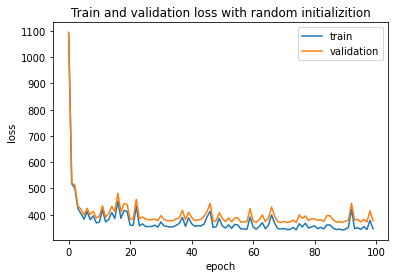

In [ ]:
x = np.arange(0, 100 )  #0.1 regularization for weight
plt.plot(x , lt ,label="train")
plt.plot(x , lv , label ="test")
plt.legend(['train','validation'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('Train and validation loss with random initializition');
plt.show()

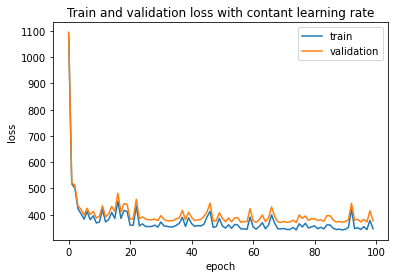

In [ ]:
x = np.arange(0, 100 )  
plt.plot(x , lt ,label="train")
plt.plot(x , lv , label ="test")
plt.legend(['train','validation'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('Train and validation loss with contant learning rate');
plt.show()

In [ ]:
k = Network([128,32,32,1],1) 
lt2 ,lv2 = k.main(final_train,final_val,'step')

[1038.9816747623115, 444.90940618386674, 395.2785441347442, 408.1568043780162, 417.10185310732885, 463.0414059481735, 453.266151798388, 436.37556190370293, 378.5884670037334, 373.4735243386621, 368.08539507241727, 366.8659519800944, 363.1714957511693, 375.11783010100726, 367.48663569406256, 366.169611930756, 364.70795056019784, 360.2389880838376, 376.999111736958, 358.39731783807224, 355.9587021730066, 359.86462000345614, 355.2550804611819, 354.22802923960455, 353.78098239470154, 353.22131033247183, 352.94676391261015, 352.57147487320753, 352.18731034147663, 353.21356926921266, 352.1477553007366, 352.228760686258, 352.01021367194255, 351.260920365367, 350.77030311527477, 351.902910431471, 350.88653131429703, 350.39062990149154, 350.04990405267057, 349.8027599090902, 350.4086809022617, 349.84205773965596, 349.4737955609183, 349.41199324014025, 349.3222155867878, 349.2010288760216, 349.07012272264126, 348.9795571786719, 348.8429316535069, 348.7736682437441, 348.76962455933256, 348.818622

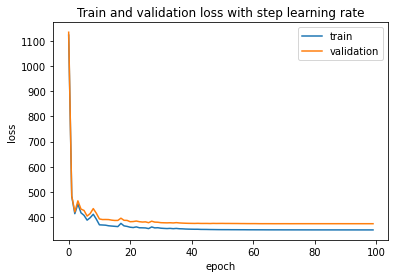

In [ ]:
x = np.arange(0, 100 )  
plt.plot(x , lt2 ,label="train")
plt.plot(x , lv2 , label ="test")
plt.legend(['train','validation'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('Train and validation loss with step learning rate');
plt.show()